# Icing: An Observational Study 🥶

Hypothesis: Icing a kicker prior to an attempty reduces the likelihood of conversion.

## Load & Clean

In [2]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import mysql.connector
import itertools
import dtale
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
from util.data import clean, get_data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
cnx = mysql.connector.connect(user='root', password='mOntie20!mysql', host='127.0.0.1', database='nfl')
df = get_data(cnx, 'g.seas<=2019', xp=False, base='raw_6_cat')
df = clean(df, dropna=False)
df

,fkicker,good,dist,year,seasons,temperature,home_team,stadium,team,XP,...,humid,wind,away_game,postseason,iced,turf,precipitation,pressure,form,kicks
pid,,,,,,,,,,,,,,,,,,,,,
2166,AD-0800,1,38,2000,17,73,BUF,Ralph Wilson Stadium,TEN,0,...,1,10,1,0,0,1,0,1,0.764708,765
2185,AD-0800,1,27,2000,17,73,BUF,Ralph Wilson Stadium,TEN,0,...,1,10,1,0,0,1,0,1,0.807721,766
4565,AD-0800,1,36,2000,17,80,TEN,Adelphia Coliseum,TEN,0,...,1,13,0,0,1,0,0,5,NaN,767
8564,AD-0800,1,24,2000,17,61,PIT,Three Rivers Stadium,TEN,0,...,0,16,1,0,0,1,1,1,0.842837,768
8628,AD-0800,1,40,2000,17,61,PIT,Three Rivers Stadium,TEN,0,...,0,16,1,0,0,1,1,1,0.871516,769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862982,ZG-0050,1,30,2019,3,66,ARI,State Farm Stadium,ARI,0,...,0,0,0,0,0,0,0,1,0.826709,62
865338,ZG-0050,1,21,2019,3,66,ARI,State Farm Stadium,ARI,0,...,0,11,0,0,0,0,0,2,0.858217,63
868268,ZG-0050,1,22,2019,3,43,SEA,CenturyLink Field,ARI,0,...,1,7,1,0,0,1,0,1,1.000000,64


In [4]:
df.describe()

,good,dist,year,seasons,temperature,XP,age,altitude,humid,wind,away_game,postseason,iced,turf,precipitation,pressure,form,kicks
count,18803.000000,18803.000000,18803.000000,18803.000000,18803.000000,18803.0,18803.000000,18803.000000,18803.000000,18803.000000,18803.000000,18803.000000,18803.000000,18803.000000,18803.000000,18803.000000,18710.000000,18803.000000
mean,0.844865,36.881242,2009.516992,7.913099,60.776153,0.0,29.927139,0.033771,0.352178,6.549593,0.487901,0.040845,0.125033,0.445408,0.080413,1.400202,0.844876,255.230601
std,0.362043,10.070235,5.643918,5.162924,15.706069,0.0,5.250091,0.180645,0.477662,5.986469,0.499867,0.197935,0.330765,0.497024,0.271938,1.024004,0.124109,209.053136
min,0.000000,18.000000,2000.000000,1.000000,-6.000000,0.0,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,28.000000,2005.000000,4.000000,51.000000,0.0,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.772214,94.000000
50%,1.000000,37.000000,2010.000000,7.000000,64.000000,0.0,29.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.865337,201.000000
75%,1.000000,45.000000,2014.000000,11.000000,70.000000,0.0,33.000000,0.000000,1.000000,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.945632,362.000000
max,1.000000,76.000000,2019.000000,26.000000,109.000000,0.0,47.000000,1.000000,1.000000,40.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,1033.000000


## Explore

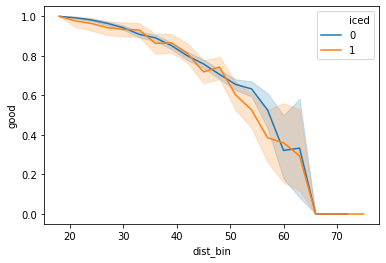

In [5]:
df_ = df.copy()
df_['dist_bin'] = 3*round(df_['dist']/3)
sns.lineplot(x='dist_bin', y='good', hue='iced', data=df_)

## Pair

* Mahanalobis vs Propensity score vs normal matching.
* Normal matching may result in best of one group matching only worst in the other group.
* Look into this.

In [37]:
df_long = df[df['dist']>=45].drop(['fkicker', 'home_team', 'stadium', 'team', 'XP', 'away_game'], axis=1)
df_long['form'] = df_long['form'].fillna(method='bfill')
df_long.dropna(inplace=True)
print(df_long['iced'].value_counts())
df_long

0    4220
1     817
Name: iced, dtype: int64


,good,dist,year,seasons,temperature,age,altitude,humid,wind,postseason,iced,turf,precipitation,pressure,form,kicks
pid,,,,,,,,,,,,,,,,
11064,0,46,2000,17,72,38,0,1,5,0,1,0,0,1,1.000000,771
20774,1,46,2000,17,54,38,0,0,9,0,0,0,0,1,0.710344,779
32219,1,50,2000,17,30,38,0,0,7,0,1,1,0,6,0.961555,795
479437,0,63,2011,1,61,24,0,0,0,0,0,1,0,1,0.605990,2
495847,1,47,2011,1,51,24,0,1,2,0,0,0,0,1,0.725456,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838716,0,48,2019,3,66,24,0,0,0,0,0,0,0,1,0.835520,44
844674,1,47,2019,3,56,24,0,1,3,0,0,1,1,1,0.813096,52
846996,1,50,2019,3,70,24,0,0,0,0,0,1,0,1,0.771461,56


In [38]:
df_long = df_long[df_long['pressure']>=1]

In [40]:
from util.matching import match

df_long['iced'] = df_long['iced'].astype(bool)
matches = match(df_long.drop('good', axis=1), t='iced', distance='mahalanobis', method='with_replacement', caliper=1)
unique_less = set(map(lambda x: x['match'], matches.values())) # potentially repeated "less" samples
unique_more = set(matches.keys())
match_ids = unique_less.union(unique_more)
overlap = unique_less.intersection(unique_more)
print(len(unique_more), 'unique keys.', len(unique_less), 'unique matches.', len(overlap), 'overlapping.')
df_matched = df.loc[match_ids, :]
df_matched

406 unique keys. 208 unique matches. 0 overlapping.


,fkicker,good,dist,year,seasons,temperature,home_team,stadium,team,XP,...,humid,wind,away_game,postseason,iced,turf,precipitation,pressure,form,kicks
pid,,,,,,,,,,,,,,,,,,,,,
759809,CB-0700,0,48,2017,10,70,NO,Mercedes-Benz Superdome,CHI,0,...,0,0,1,0,1,1,0,1,0.973805,193
362497,SS-3100,1,47,2008,4,68,DET,Ford Field,WAS,0,...,0,0,1,0,1,1,0,1,0.753050,69
362509,SS-3100,1,45,2008,4,68,DET,Ford Field,WAS,0,...,0,0,1,0,0,1,0,1,0.797950,70
774159,HB-0500,1,53,2017,1,46,KC,Arrowhead Stadium,KC\r,0,...,0,13,0,0,0,0,0,1,0.978413,26
776212,HB-0500,0,52,2017,1,53,KC,Arrowhead Stadium,KC\r,0,...,0,9,0,0,1,0,0,1,0.992464,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690159,JL-0207,1,47,2015,1,47,OAK,O.co Coliseum Oakland,SD\r,0,...,1,25,1,0,1,0,0,1,0.823119,27
565232,JF-0900,0,50,2013,13,70,STL,Edward Jones Dome,ARI,0,...,0,0,1,0,0,1,0,1,0.848071,372
483316,RS-3400,1,54,2011,3,65,KC,Arrowhead Stadium,KC\r,0,...,0,7,0,0,0,0,0,1,0.811232,61


In [41]:
df_ice = df_matched.loc[df_matched['iced']==1, :]
df_noice = df_matched.loc[df_matched['iced']==0, :]
print(len(df_ice), 'iced samples.', len(df_noice), 'not-iced samples.')

208 iced samples. 406 not-iced samples.


## Model

We work within a Bayesian framework, setting a prior distribution on the true population proportion and update the prior after our observations. The Beta-Binomial conjugacy makes this process relatively pain-free.

In [42]:
from scipy.stats import beta
p_hat = df[df['dist']>=40]['good'].mean()
alpha_ = 12
beta_ = int(round(alpha_*(1-p_hat)/p_hat))
print(f'alpha: {alpha_}, beta: {beta_}')

alpha: 12, beta: 5


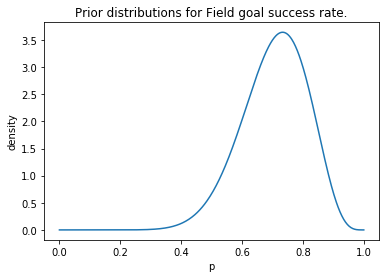

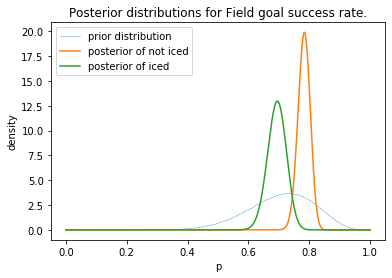

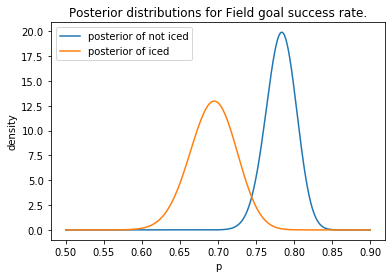

In [43]:
from util.bayes import BetaBinomial

control = BetaBinomial(alpha_, beta_, 'not iced')
treatment = BetaBinomial(alpha_, beta_, 'iced')
control.plot_prior(show=True)
plt.cla()

control.observe(df_noice['good'])
treatment.observe(df_ice['good'])

control.plot_posterior(prior=True)
treatment.plot_posterior(show=True, prior=False)

# zoom in
x = np.linspace(0.5,0.9,500)
control.plot_posterior(x, prior=False, show=False)
treatment.plot_posterior(x, prior=False, show=True)

samples = 20000
samples_posterior_noice = control.sample(samples)
samples_posterior_ice = treatment.sample(samples)

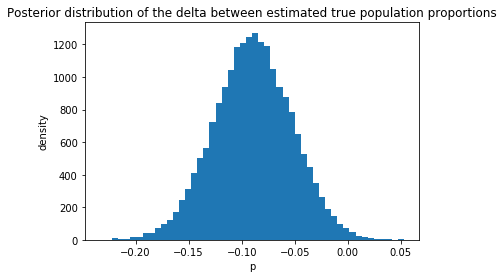

99 % likely that iced has a lower true population proportion of converted field goals.
-0.09 is the median difference, with 50% credible interval of (0.0,-0.18).


In [44]:
posterior_diff = samples_posterior_ice - samples_posterior_noice

plt.hist(posterior_diff, histtype='stepfilled', bins=50)
plt.xlabel('p')
plt.ylabel('density')
plt.title('Posterior distribution of the delta between estimated true population proportions')
plt.show()
print(int((samples_posterior_ice<samples_posterior_noice).mean()*100), r'% likely that iced has a lower true population proportion of converted field goals.')

from scipy.stats import bayes_mvs
alpha = 0.5
center, _, _ = bayes_mvs(posterior_diff, alpha=alpha)
print(f'{round(center.statistic,2)} is the median difference, with {int(alpha*100)}% credible interval of ({round(center.statistic-center.minmax[0],2)},{round(center.statistic+center.minmax[-1],2)}).')

98 % likely relative lift less than -1%.
-0.11 is the median relative lift, with 50 credible interval of (0.0,-0.23).


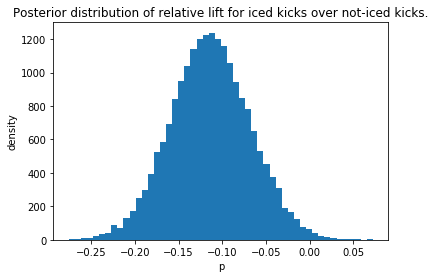

In [45]:
posterior_relative = (samples_posterior_ice-samples_posterior_noice)/samples_posterior_noice
plt.hist(posterior_relative, histtype='stepfilled', bins=50)
plt.xlabel('p')
plt.ylabel('density')
plt.title('Posterior distribution of relative lift for iced kicks over not-iced kicks.')
print(int((posterior_relative<-0.01).mean()*100), r'% likely relative lift less than -1%.')

center, _, _ = bayes_mvs(posterior_relative, alpha=alpha)
print(f'{round(center.statistic,2)} is the median relative lift, with {int(alpha*100)} credible interval of ({round(center.statistic-center.minmax[0],2)},{round(center.statistic+center.minmax[-1],2)}).')